# Data Exploration

### Annotation
The code in the following code blocks was either composed of own code or mostly code provided in the Data Mining exercises. Furthermore, the code was to a large extent adjusted with respect to coloring, scaling, labels, descriptions, etc. by the means of ChatGPT and Copilot.

The *Diabetes Health Indicators Dataset* contains three files:
1. The **diabetes_012_health_indicators_BRFSS2015.csv** dataset serves as the foundation for the other two files. This dataset has already been preprocessed and is thus clean with no missing values or outliers. The target variable consists of three classes: 0 for individuals without diabetes or only during pregnancy, 1 for individuals with prediabetes, and 2 for individuals with diabetes. This dataset is imbalanced and comprises 253,680 observations with 21 feature variables.
2. The **diabetes_binary_health_indicators_BRFSS2015.csv** dataset comprises only two classes in the target variable: 0 is for no diabetes, and 1 for prediabetes or diabetes. This dataset is imbalanced and has 253,680 observations with 21 feature variables.
3. The **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** is a balanced dataset. It has an equal 50-50 split of individuals with no diabetes and with either prediabetes or diabetes. This dataset is balanced and consists of 70,692 observations with 21 feature variables.

Our following explorative analysis only uses the second, i.e. the imbalanced and binary dataset, for the following reasons:
- **Training and learning classifiers**: We aim to train and evaluate classifiers specifically designed for binary classification, making the binary dataset more suitable for our needs.
- **Real feature distribution**: The imbalanced dataset allows us to observe the true distribution of features, which is crucial for understanding the data's characteristics.
- **Simpler, more interpretable plots**: Reducing the target variable to two classes enhances plot simplicity and interpretability compared to using three classes.

In [2]:
# Import necessary libraries for data exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [3]:
# Read in the raw diabetes_binary_health_indicators_BRFSS2015.csv dataset
df_diabetes_binary = pd.read_csv('../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv')

# Describe the shape of the dataset
rows, columns = df_diabetes_binary.shape
print(f"Number of rows: {rows} | Number of columns: {columns}")


Number of rows: 253680 | Number of columns: 22


Our dataset consists of 253,680 rows/data points which each represent a person and the 22 columns are the target variable together with the 21 features.

In [3]:
# Display the first five rows of all 21 features together with the target variable "Diabetes_binary"
df_diabetes_binary.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In the sample of five data points we can already see that, besides the target variable, most of the features are also of binary/categorical type.

In [5]:
# Print the data type of the target variable and the 21 features
print(df_diabetes_binary.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


However, as we can see above, all features are saved as decimal/continuous type instead of integer in the dataset which might be confusing but does not cause any conflict with respect to our further actions.

In [6]:
# Get more insights on the basic statistics of the dataset
df_diabetes_binary.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


With respect to the target variable, we can already see by looking at the mean (which is below 0.5, meaning it tends towards the negative outcome) and also the median (which is the "50%" here in the basic statistics) that the dataset is imbalanced towards zero, meaning "No Diabetes". 

In [7]:
# Get information on missing data of the dataset
missing_values = df_diabetes_binary.isnull().sum()
print(missing_values)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In this Diabetes_binary dataset are no missing values, meaning we got a clean dataset which makes it easy to work with.

In [7]:
# Get information on the standard deviation of features
df_diabetes_binary.std()


Diabetes_binary         0.346294
HighBP                  0.494934
HighChol                0.494210
CholCheck               0.189571
BMI                     6.608694
Smoker                  0.496761
Stroke                  0.197294
HeartDiseaseorAttack    0.292087
PhysActivity            0.429169
Fruits                  0.481639
Veggies                 0.391175
HvyAlcoholConsump       0.230302
AnyHealthcare           0.215759
NoDocbcCost             0.277654
GenHlth                 1.068477
MentHlth                7.412847
PhysHlth                8.717951
DiffWalk                0.374066
Sex                     0.496429
Age                     3.054220
Education               0.985774
Income                  2.071148
dtype: float64

The features Physical Health, Mental Health, BMI, Age, Income, General Health, and Education are the ones with the highest standard deviation.
Those are also the features that are either of categorical but non-binary type or actually of decimal/numerical type (e.g., BMI).

In [8]:
# Get information on the variance of features
df_diabetes_binary.var()

Diabetes_binary          0.119920
HighBP                   0.244960
HighChol                 0.244243
CholCheck                0.035937
BMI                     43.674839
Smoker                   0.246771
Stroke                   0.038925
HeartDiseaseorAttack     0.085315
PhysActivity             0.184186
Fruits                   0.231976
Veggies                  0.153018
HvyAlcoholConsump        0.053039
AnyHealthcare            0.046552
NoDocbcCost              0.077091
GenHlth                  1.141644
MentHlth                54.950296
PhysHlth                76.002675
DiffWalk                 0.139925
Sex                      0.246442
Age                      9.328262
Education                0.971751
Income                   4.289652
dtype: float64

The same as for the standard deviation applies, of course, for the variance as it is the squared version of the standard variance.

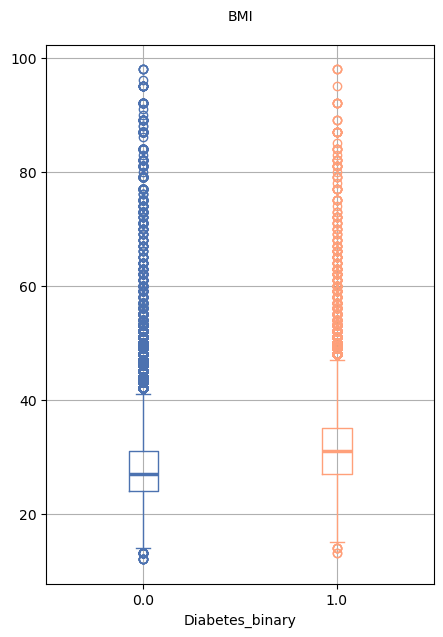

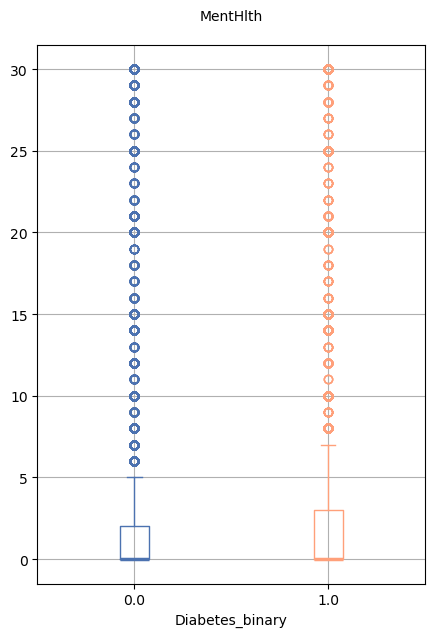

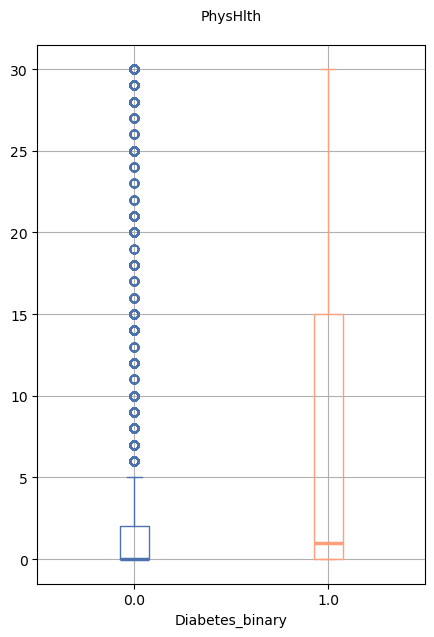

In [ ]:
# Create boxplots for numerical features
import matplotlib.pyplot as plt

# Define the colors
box_color_blue = '#4c72b0'
median_color_blue = '#4c72b0'
box_color_orange = '#FFA07A'
median_color_orange = '#FFA07A'


# Create boxplots for numerical features (combined classes)
boxplot_features = ['BMI', 'MentHlth', 'PhysHlth']
for f in boxplot_features:
    fig, ax = plt.subplots(figsize=(5, 7))
    
    # Boxplot for Diabetes_binary class 0.0
    df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0.0].boxplot(
        column=f,
        ax=ax,
        positions=[1],
        patch_artist=False,
        boxprops=dict(color=box_color_blue),
        whiskerprops=dict(color=box_color_blue),
        capprops=dict(color=box_color_blue),
        flierprops=dict(markeredgecolor=box_color_blue),
        medianprops=dict(color=median_color_blue, linewidth=2.5)
    )
    
    # Boxplot for Diabetes_binary class 1.0
    df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1.0].boxplot(
        column=f,
        ax=ax,
        positions=[2],
        patch_artist=False,
        boxprops=dict(color=box_color_orange),
        whiskerprops=dict(color=box_color_orange),
        capprops=dict(color=box_color_orange),
        flierprops=dict(markeredgecolor=box_color_orange),
        medianprops=dict(color=median_color_orange, linewidth=2.5)
    )
    
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['0.0', '1.0'])
    ax.set_xlabel("Diabetes_binary", fontsize=10)
    ax.set_title("{}\n".format(f), fontsize=10)
    plt.show()

All three features (BMI, Mental Health, and Physical Health) are right-skewed and it seems like there are some outliers except for the category/class 1.0 (Diabetes) of the Physical Health feature. In the above cases the outlier values mostly reach higher ranges towards the maximum value but for BMI also some towards the minimum value. The BMI feature is also the feature with the most outliers, as there seem to be more data points in the higher ranges. However, those "outliers" seem reasonable as the dataset is composed of samples of people in the U.S.A. in which obesity is an increasing problem (as it is stated by the National Institute of Diabetes and Digestive and Kindney Diseases here: https://www.niddk.nih.gov/health-information/health-statistics/overweight-obesity). Therefore, values in the rather very high ranges seem plausible. In general, outliers can have a negative influence on the models' performance with respect to correct predictions.

BMI         float64
MentHlth    float64
PhysHlth    float64
dtype: object


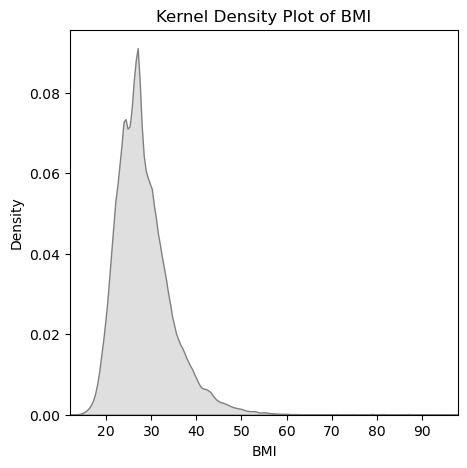

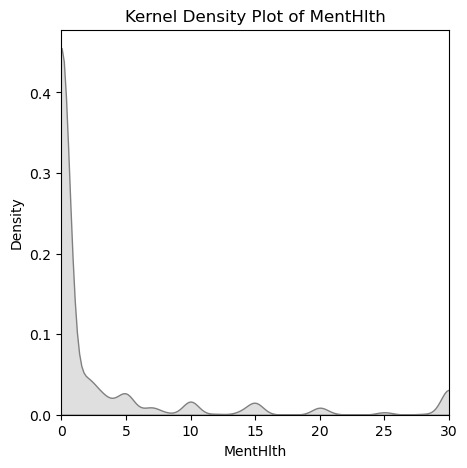

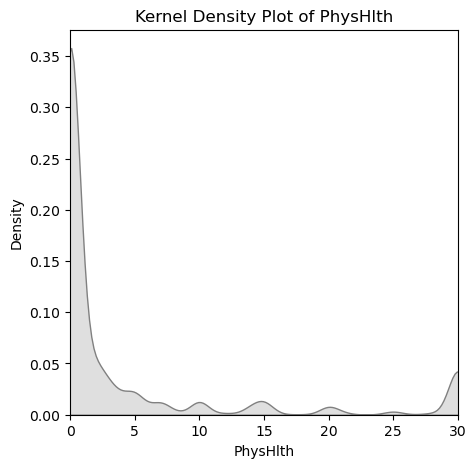

In [10]:
# Create kernel density plots for numerical features
density_plot_features = ['BMI', 'MentHlth', 'PhysHlth']

print(df_diabetes_binary[density_plot_features].dtypes)

for f in density_plot_features:
    plt.figure(figsize=(5, 5))
    sns.kdeplot(df_diabetes_binary[f], fill=True, color='grey')
    plt.title(f'Kernel Density Plot of {f}')
    plt.xlabel(f)
    plt.ylabel('Density')
    plt.xlim(left=df_diabetes_binary[f].min(), right=df_diabetes_binary[f].max())
    plt.show()

As already previously discussed in the context of boxplots, the right-skewness of the three features above is again, now even more, visible in their respective kernel desity/distribution plots.

BMI         float64
MentHlth    float64
PhysHlth    float64
dtype: object


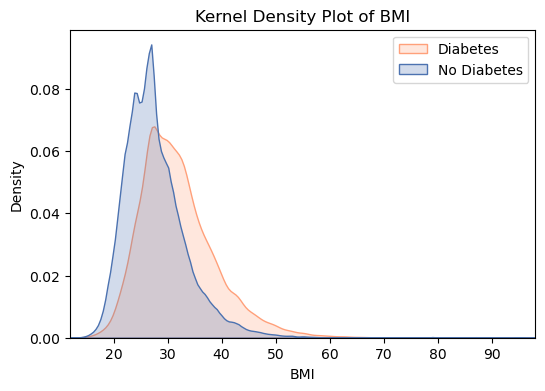

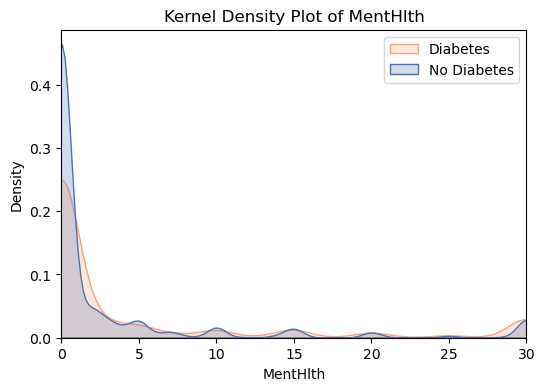

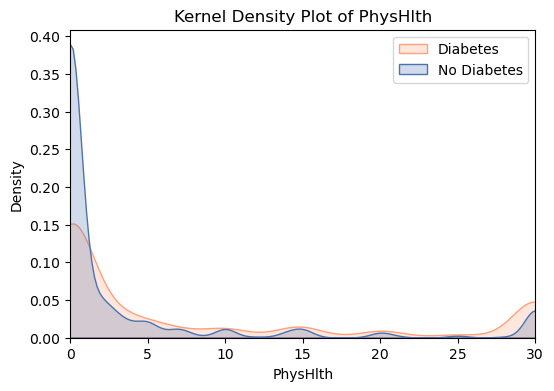

In [11]:
#Create kernel density plots for numerical features 
density_plot_features = ['BMI', 'MentHlth', 'PhysHlth',]

print(df_diabetes_binary[density_plot_features].dtypes)

for f in density_plot_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1.0][f], color='#FFA07A', fill=True, label='Diabetes')
    sns.kdeplot(df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0.0][f], color='#4c72b0', fill=True, label='No Diabetes')
    plt.title(f'Kernel Density Plot of {f}')
    plt.xlabel(f)
    plt.ylabel('Density')
    plt.xlim(left=df_diabetes_binary[f].min(), right=df_diabetes_binary[f].max())
    plt.legend()
    plt.show()

In the three kernel desity plots above in which, moreover, the distribution of the classes are distinguished, it is evident that those three features themselves are highly right-skewed and that class zero (No Diabetes) seems to mostly account for the overall right-skewness of the features. 

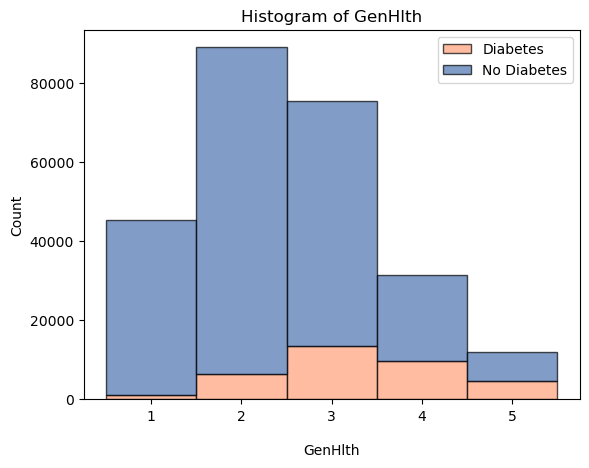

<Figure size 600x500 with 0 Axes>

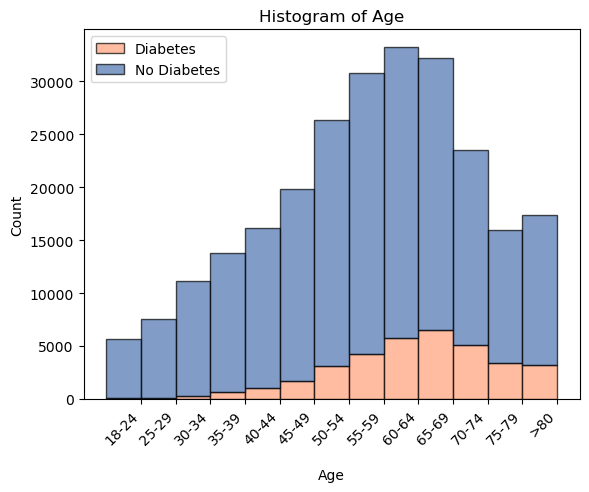

<Figure size 600x500 with 0 Axes>

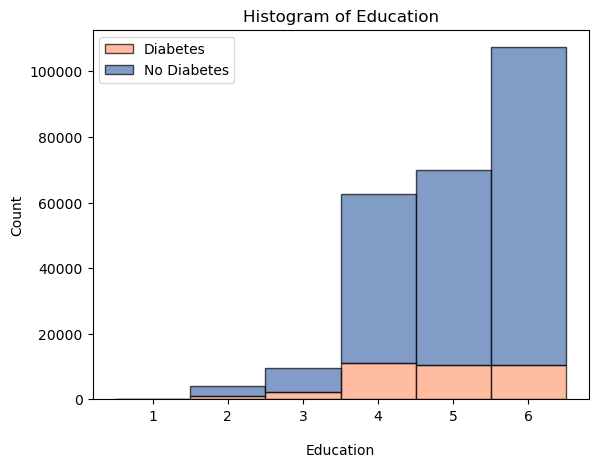

<Figure size 600x500 with 0 Axes>

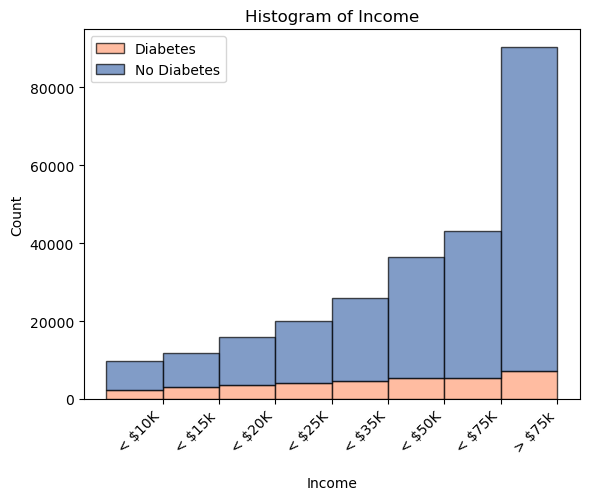

<Figure size 600x500 with 0 Axes>

In [10]:
# Create histograms for ordinal features (GenHlth, Age, Education, Income) and the remaining features which are not numerical and ordinal but binary (H)
histogram_features = ['GenHlth','Age','Education', 'Income']




# Define custom x-labels for specific features
custom_labels = {
    'Age': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
            '55-59', '60-64', '65-69', '70-74', '75-79', '>80',],
    'Income': ['< $10K', '< $15k', '< $20K', '< $25K', '< $35K', '< $50K', '< $75K', '> $75k',],
}

# Loop through each feature in the list
for f in histogram_features:
    
    # Adjust bins to scale according to minimum and maximum values
    min_val = int(df_diabetes_binary[f].min())
    max_val = int(df_diabetes_binary[f].max()) + 1
    bins = np.arange(min_val, max_val + 1, 1)
    
    # Plot histograms for each Diabetes_binary class with colors and settings
    plt.hist([df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1.0][f],
              df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0.0][f]], 
             color=['#FFA07A', '#4c72b0'], alpha=0.7, edgecolor='black', stacked=True, bins=bins)
    
    # Add title and labels with adjusted label position
    plt.title(f'Histogram of {f}', fontsize=12)
    plt.xlabel(f, labelpad=15)  # Increase labelpad to move x-axis label lower
    plt.ylabel('Count')
    
    # Set x-ticks at the start of each bin but without labels
    # plt.xticks(bins[:-1], labels=[])
    plt.legend(['Diabetes', 'No Diabetes'])

        # Use custom labels if available, otherwise default to numeric labels
    if f in custom_labels:
        plt.xticks(ticks=bins[:-1] + 1, labels=custom_labels[f], rotation=45, ha='right', fontsize=10)
    else:
        plt.xticks(ticks=bins[:-1] + 0.5, labels=[str(i) for i in bins[:-1]], fontsize=10)

    # Add labels at the center of each bin
    for i in range(len(bins) - 1):
        label_position = (bins[i] + bins[i + 1]) / 2  
        # plt.text(label_position, -0.02 * plt.ylim()[1], str(int(bins[i])), ha='center', va='top', fontsize=10)
    
    # Show the plot
    plt.figure(figsize=(6, 5))
    plt.show()

The histograms of the feature, once again, reveal the imbalance with respect to the target variable in the dataset. 
However, it is interesting for the ordinal features to mention that, except for General Health, the ordinal features Age, Education and Income are rather left-skewed, also regarding both classes of the target variable, in ascending order of their reference here.

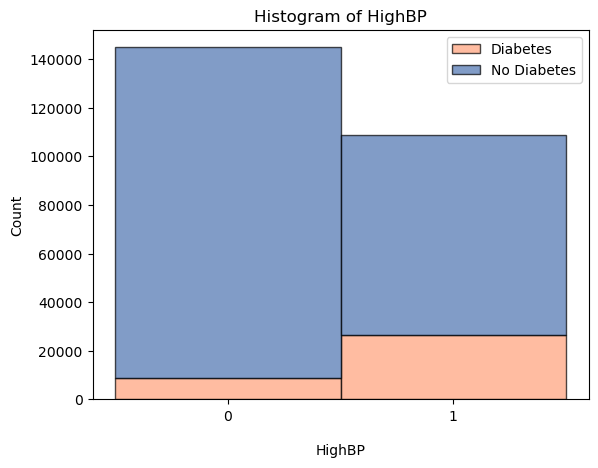

<Figure size 600x500 with 0 Axes>

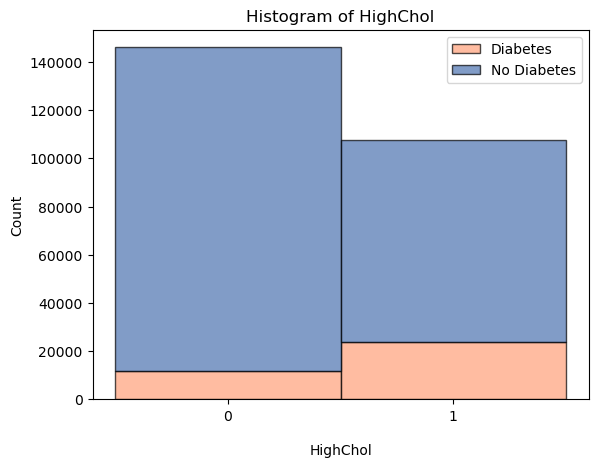

<Figure size 600x500 with 0 Axes>

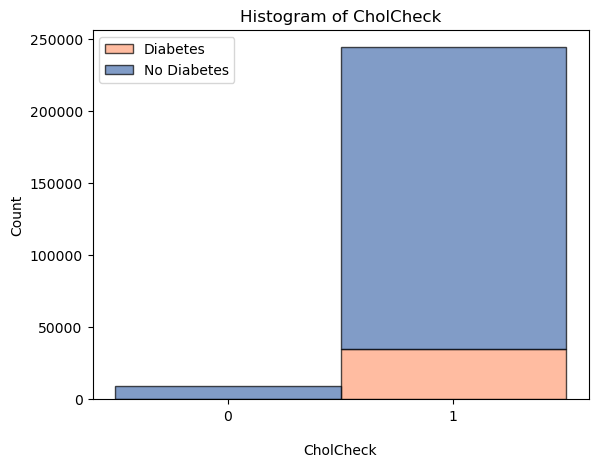

<Figure size 600x500 with 0 Axes>

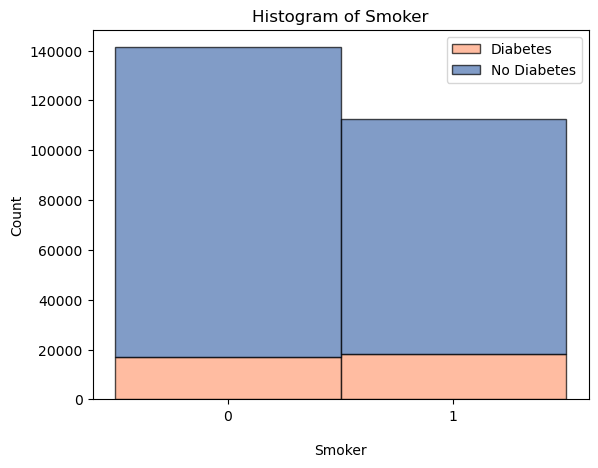

<Figure size 600x500 with 0 Axes>

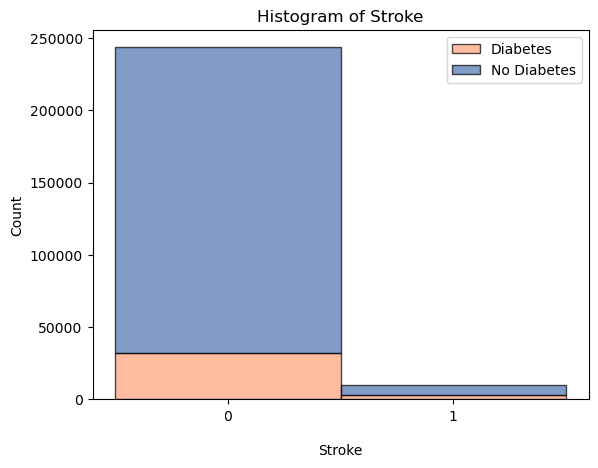

<Figure size 600x500 with 0 Axes>

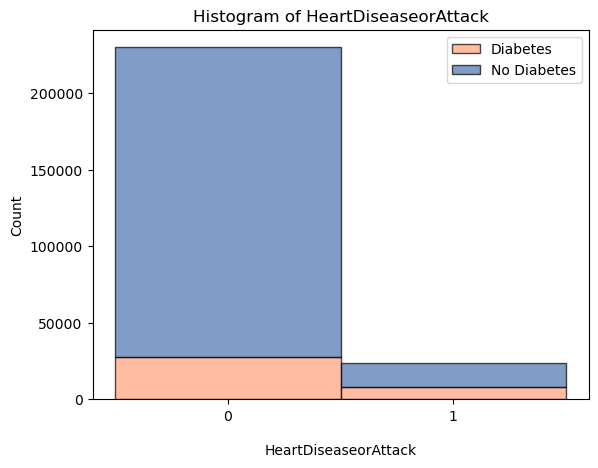

<Figure size 600x500 with 0 Axes>

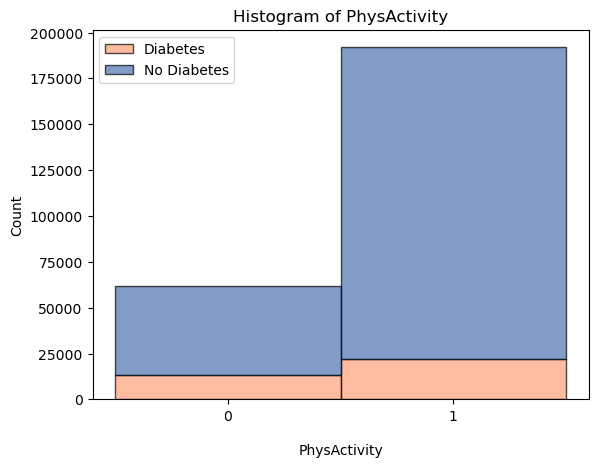

<Figure size 600x500 with 0 Axes>

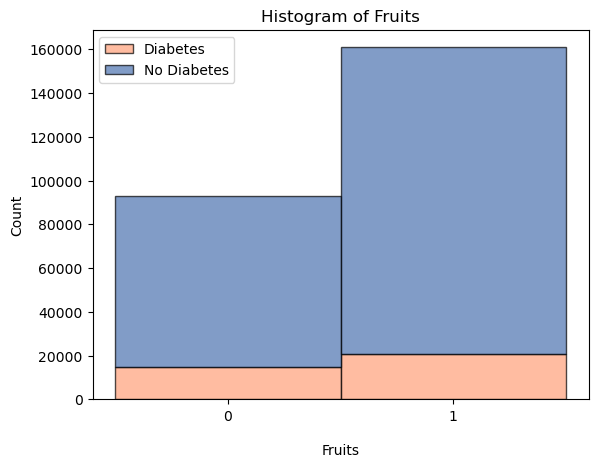

<Figure size 600x500 with 0 Axes>

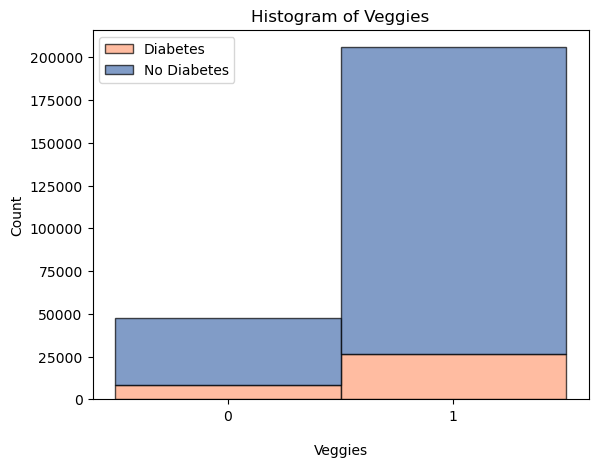

<Figure size 600x500 with 0 Axes>

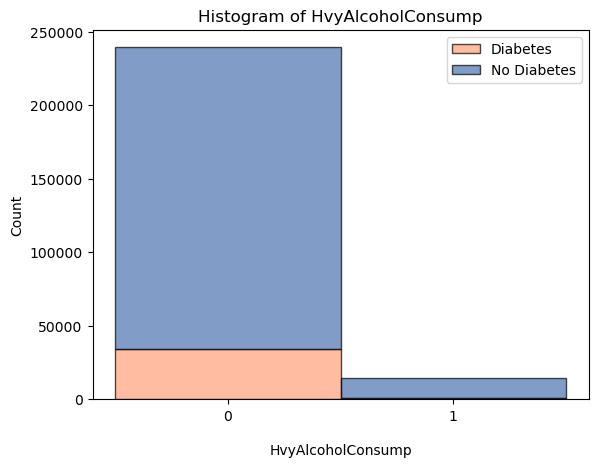

<Figure size 600x500 with 0 Axes>

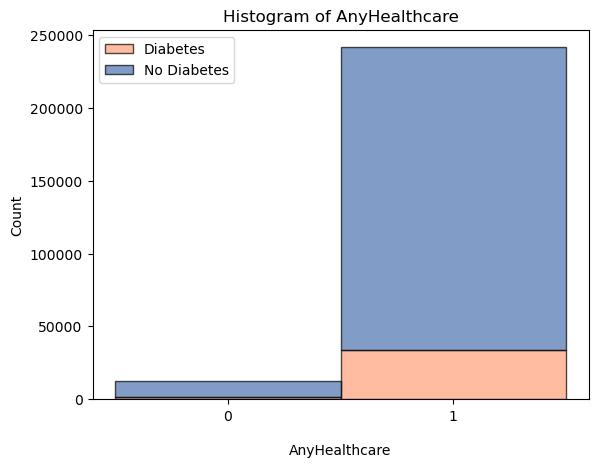

<Figure size 600x500 with 0 Axes>

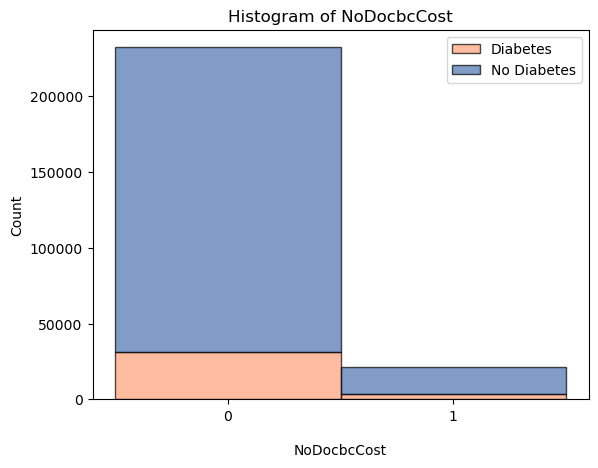

<Figure size 600x500 with 0 Axes>

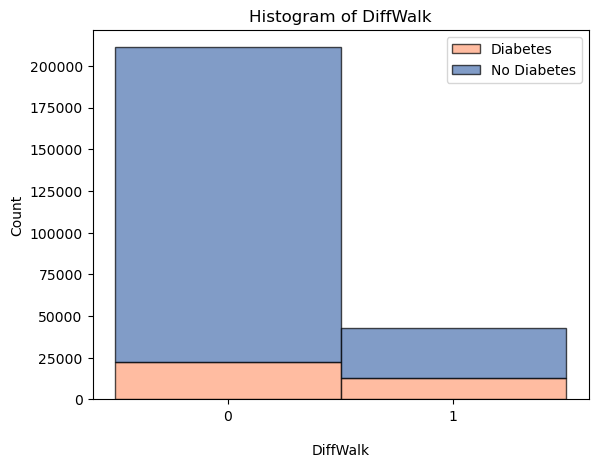

<Figure size 600x500 with 0 Axes>

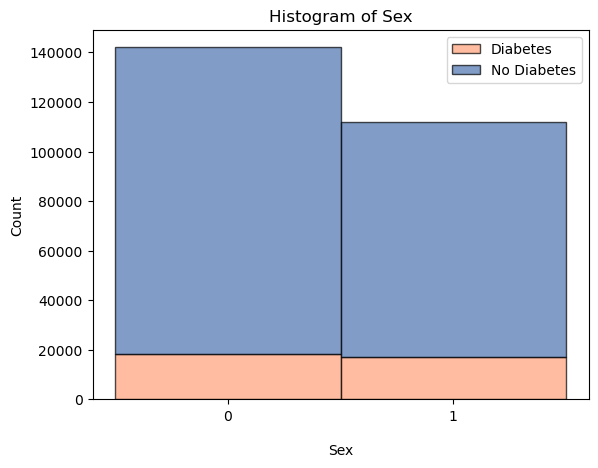

<Figure size 600x500 with 0 Axes>

In [11]:
# Create histograms for the remaining features which are not numerical and ordinal but binary 
histogram_features = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex", ]




# Define custom x-labels for specific features
custom_labels = {
    'Age': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
            '55-59', '60-64', '65-69', '70-74', '75-79', '>80',],
    'Income': ['< $10K', '< $15k', '< $20K', '< $25K', '< $35K', '< $50K', '< $75K', '> $75k',],
}

# Loop through each feature in the list
for f in histogram_features:
    
    # Adjust bins to scale according to minimum and maximum values
    min_val = int(df_diabetes_binary[f].min())
    max_val = int(df_diabetes_binary[f].max()) + 1
    bins = np.arange(min_val, max_val + 1, 1)
    
    # Plot histograms for each Diabetes_binary class with colors and settings
    plt.hist([df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 1.0][f],
              df_diabetes_binary[df_diabetes_binary['Diabetes_binary'] == 0.0][f]], 
             color=['#FFA07A', '#4c72b0'], alpha=0.7, edgecolor='black', stacked=True, bins=bins)
    
    # Add title and labels with adjusted label position
    plt.title(f'Histogram of {f}', fontsize=12)
    plt.xlabel(f, labelpad=15)  # Increase labelpad to move x-axis label lower
    plt.ylabel('Count')
    
    # Set x-ticks at the start of each bin but without labels
    # plt.xticks(bins[:-1], labels=[])
    plt.legend(['Diabetes', 'No Diabetes'])

        # Use custom labels if available, otherwise default to numeric labels
    if f in custom_labels:
        plt.xticks(ticks=bins[:-1] + 1, labels=custom_labels[f], rotation=45, ha='right', fontsize=10)
    else:
        plt.xticks(ticks=bins[:-1] + 0.5, labels=[str(i) for i in bins[:-1]], fontsize=10)

    # Add labels at the center of each bin
    for i in range(len(bins) - 1):
        label_position = (bins[i] + bins[i + 1]) / 2  
        # plt.text(label_position, -0.02 * plt.ylim()[1], str(int(bins[i])), ha='center', va='top', fontsize=10)
    
    # Show the plot
    plt.figure(figsize=(6, 5))
    plt.show()

With respect to the binary features, one can also see that there exists high imbalance within the data.
For the target variable being Diabetes, the feature HighBP (high blood pressure) has in total more counts in the negative class (0 - no high blood pressure) of the feature. So does HighCol, CholCheck and AnyHealthcare (which interestingly have no count at all in the negative class 0, meaning no CholChech has been performed and and there was no health care at all available in case of the target variable being Diabetes), PhysActivity, Fruits, Veggies and Smoker. For the latter, the count for the positive class of the respective feature is only slightly higher than for the negative class.
For the target variable still being Diabetes, the features Stroke, HeartDiseaseorAttack, HvyAlcoholConsump (which on contrary to CholCheck and AnyHealthcare before only has a count in its negative class), NoDocbcCost, DiffWalk, and Sex. 

For the target variable being No Diabetes, for HighBP, HighCol, Smoker, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump, NoDocbcCost, DiffWalk, and Sex the count is higher for the negative class of the features. CholCheck, PhysActivity, Fruits, Veggies, and AnyHealthcare have higher counts in their positive class.

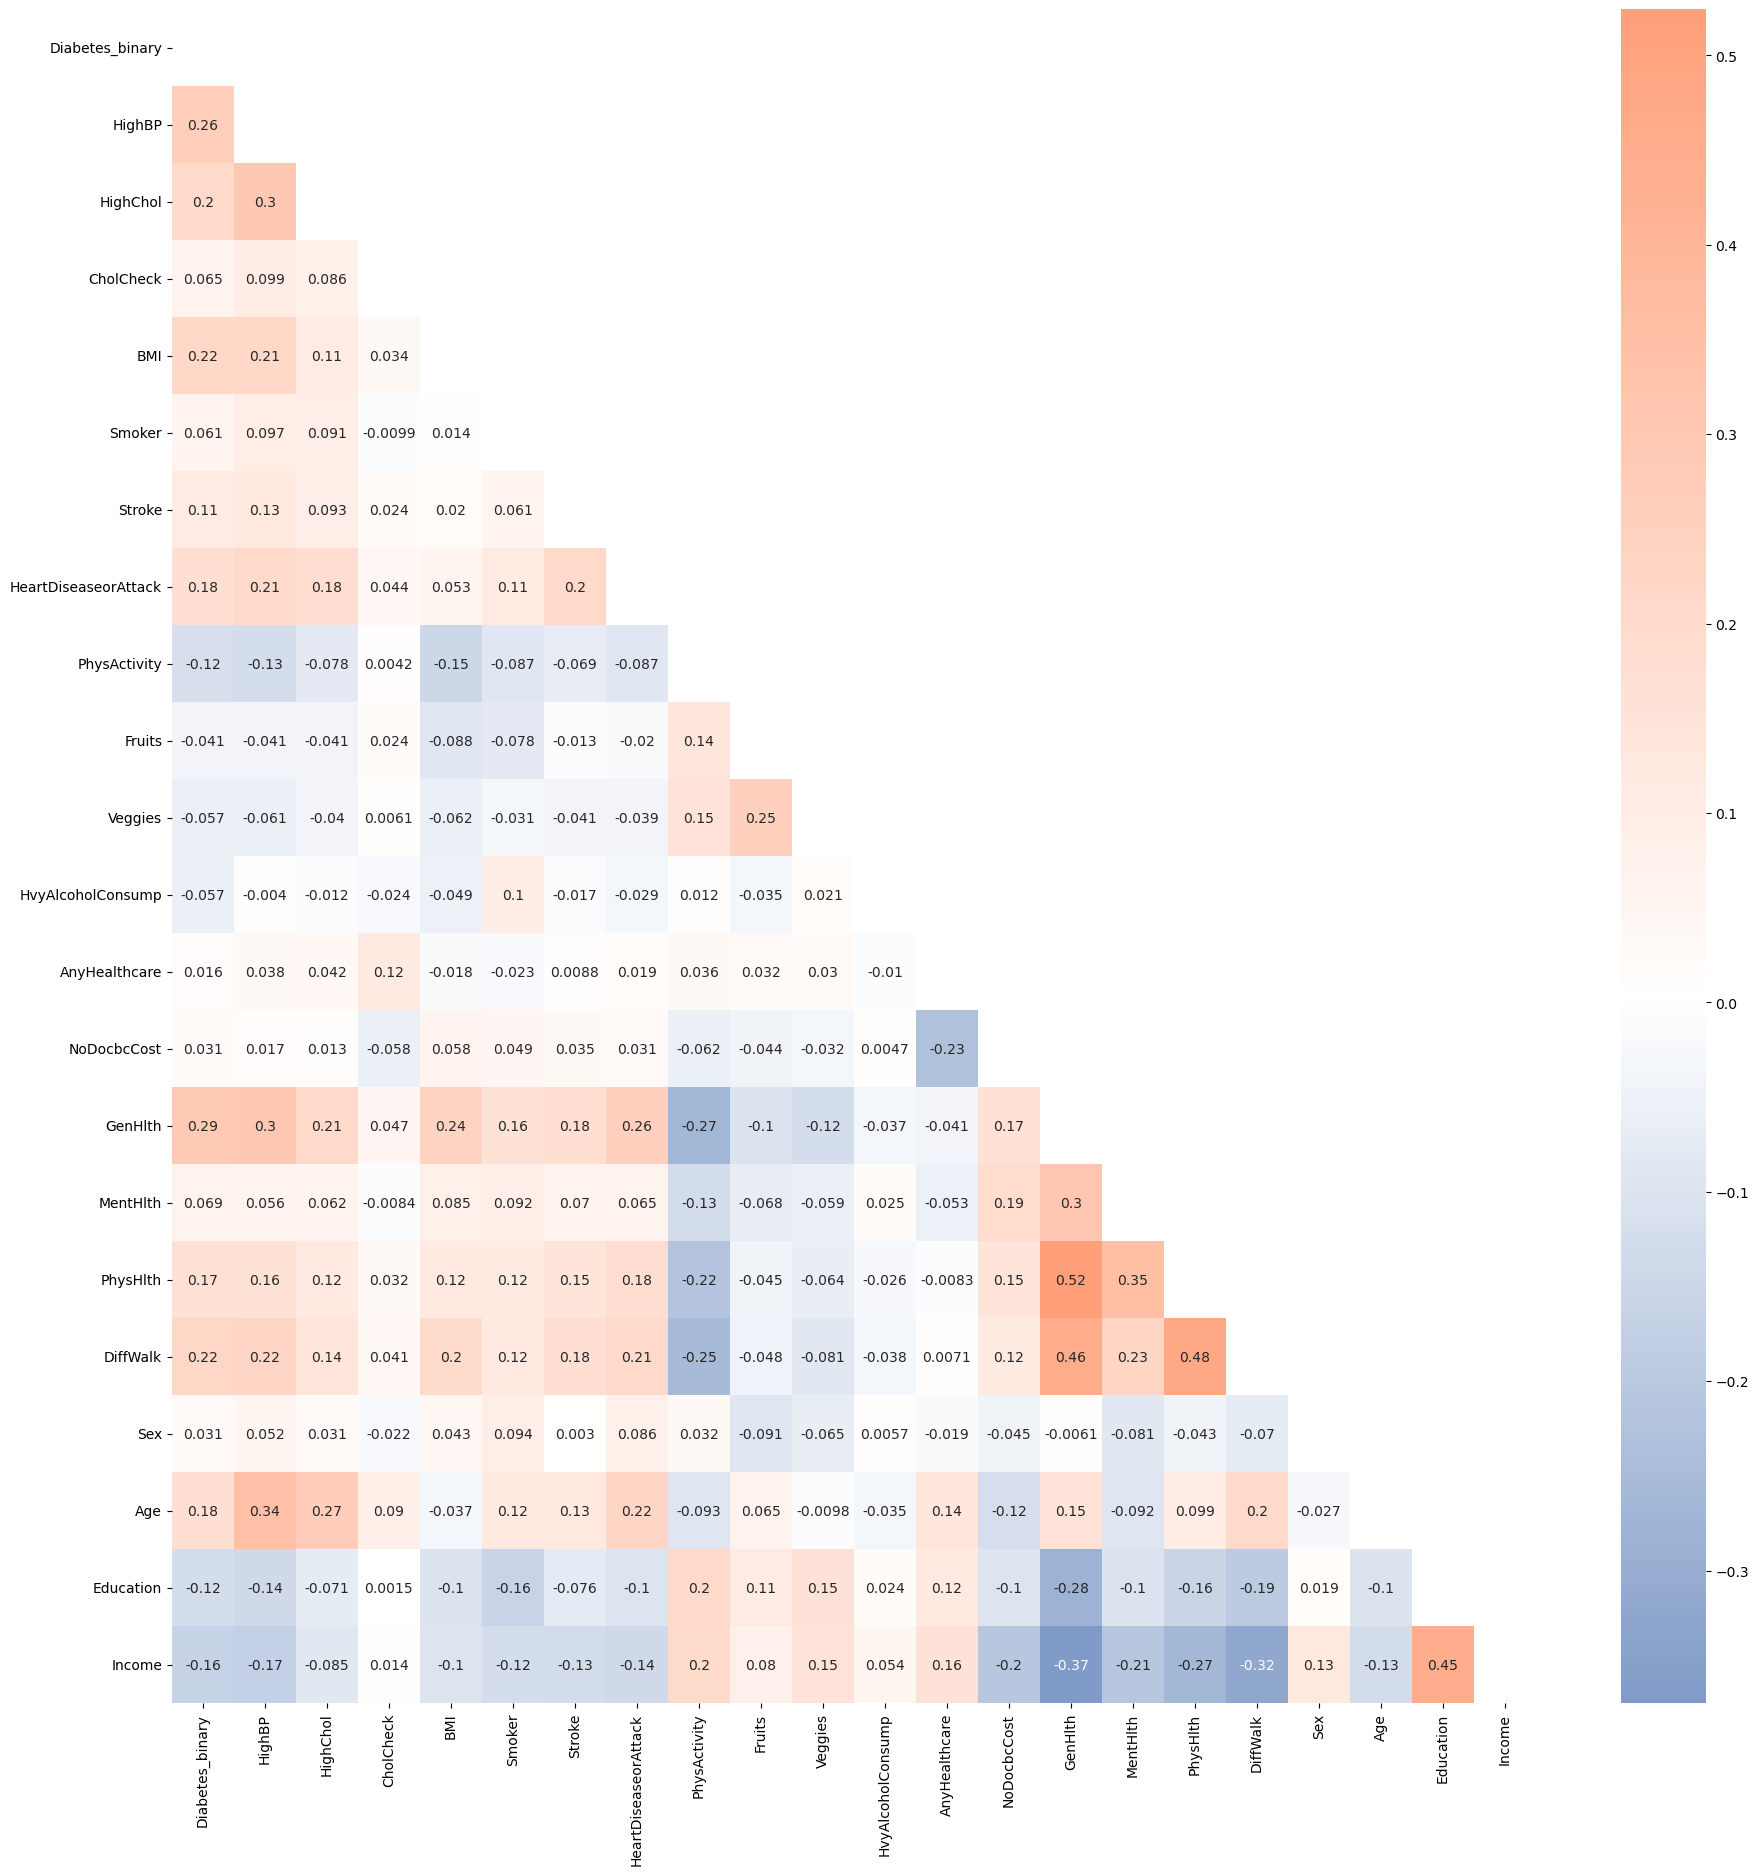

In [13]:
# Create correlation matrix but without redundant values

# Define the custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#4c72b0', 'white', '#FFA07A'])

# Create correlation matrix but without redundant values
plt.figure(figsize=(22, 22))
no_redundance = np.triu(df_diabetes_binary.corr())
sns.heatmap(df_diabetes_binary.corr(), mask=no_redundance, annot=True, cmap=cmap, center=0)
plt.show()

The correlation matrix reveals that there does not exist multicollinearity or at least no high multi-collinearity which could lead to false predictions if the one of the false predictor features of each pair would not be taken out for prediction. However, as this is not the case here (except maybe slightly for the pairs of features: General Health & Physical Health, General Health & Difficulty Walking, Physical Health & Difficulty Walking and Education & Income), we take all the 21 features for prediction into account and do not remove any.

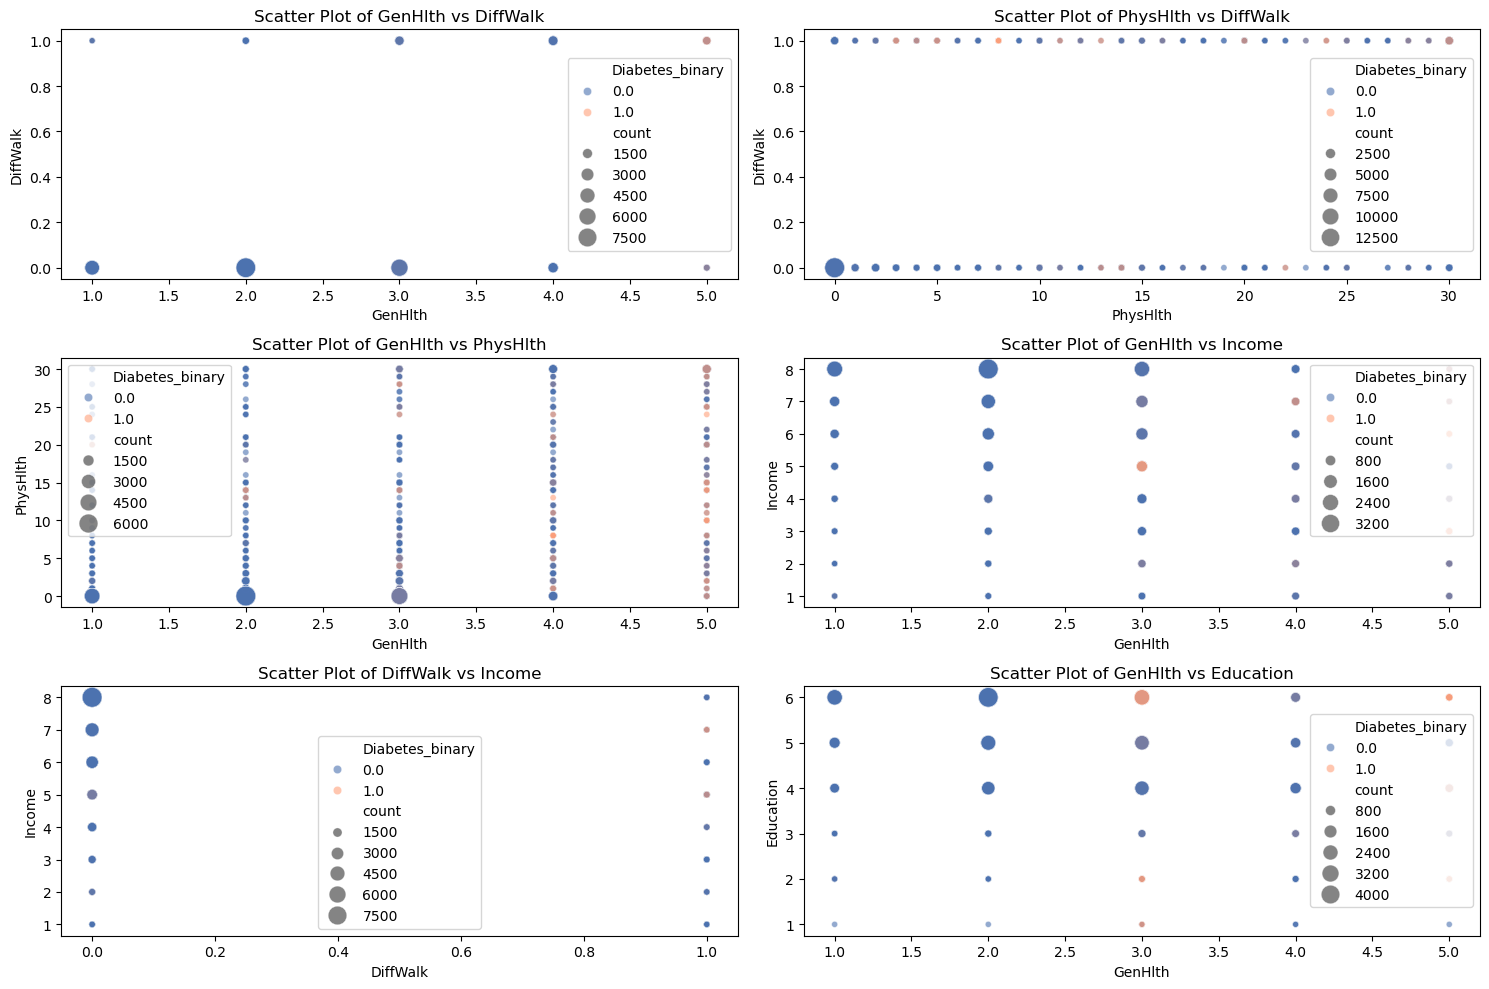

In [14]:
# Create pair plot/ scatterplot for three feature pairs with highest and lowest correlations to display multi-collinearity 

# Load the sample and correlation matrix
sampled_data = df_diabetes_binary.sample(frac=0.1)
correlation_matrix = sampled_data.corr()

# Identify the highest and lowest correlation pairs
# Flatten correlation matrix, filter out self-correlations, and get abs values to find top correlations
corr_pairs = correlation_matrix.unstack().drop_duplicates()
sorted_corr_pairs = corr_pairs[abs(corr_pairs) < 1].sort_values()

# Select top 3 positive and bottom 3 negative correlations
highest_corr_pairs = sorted_corr_pairs.tail(3).index
lowest_corr_pairs = sorted_corr_pairs.head(3).index

# Combine these into a list of selected pairs for plotting
selected_pairs = list(highest_corr_pairs) + list(lowest_corr_pairs)

# Define the colors for the classes
palette = {0.0: '#4c72b0', 1.0: '#FFA07A'}

# Initialize the plot with subplots for each pair
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Plot each pair with point sizes adjusted for counts
for i, (feature_x, feature_y) in enumerate(selected_pairs):
    # Group by feature_x and feature_y, count occurrences, and calculate sizes
    size_data = sampled_data.groupby([feature_x, feature_y]).size().reset_index(name='count')
    
    # Merge size data back to original sampled data for consistency
    merged_data = pd.merge(
        sampled_data, 
        size_data, 
        on=[feature_x, feature_y], 
        how='left'
    )
    
    # Create scatter plot with adjusted sizes
    sns.scatterplot(
        data=merged_data,
        x=feature_x,
        y=feature_y,
        hue="Diabetes_binary",
        size="count",
        sizes=(20, 200),  # Adjust point sizes (min, max)
        alpha=0.6,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f'Scatter Plot of {feature_x} vs {feature_y}')

plt.tight_layout()
plt.show()

Here, as done more extensively above, we display the six feature pairs that correlate the most. However, also thse plots reveal that multi-collinearity is not a prevelant issue with respect to the features in our case/dataset.

Imbalance Ratio: 6.18


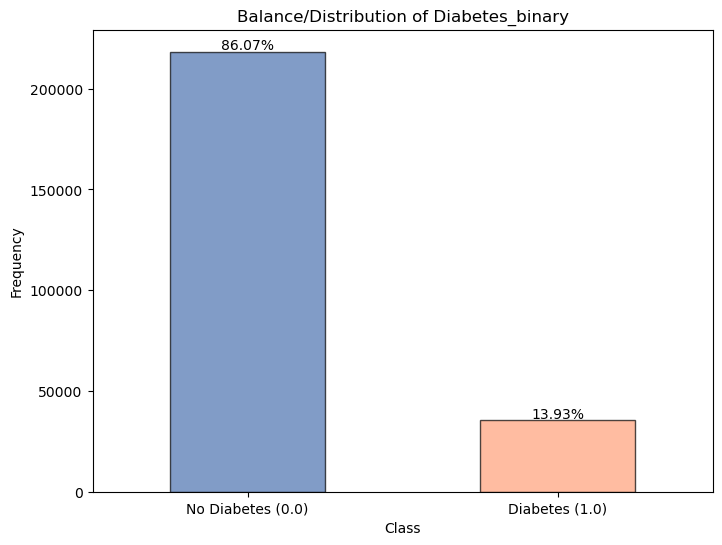

In [15]:
# Show balance/distribution within dataset Diabetes_binary

# Show the distribution of the class label with descriptive labels
class_counts = df_diabetes_binary['Diabetes_binary'].value_counts()
class_distribution = df_diabetes_binary['Diabetes_binary'].value_counts(normalize=True) * 100

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

# Plot the distribution with descriptive labels
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='bar', color=['#4c72b080', '#FFA07A80'], alpha=0.7, edgecolor='black')  
ax.set_xticklabels(['No Diabetes (0.0)', 'Diabetes (1.0)'])

# Add percentage labels on top of the bars
for i, value in enumerate(class_distribution):
    plt.text(i, class_counts[i] + 1000, f'{value:.2f}%', ha='center', fontsize=10)

# Customize the chart
plt.title("Balance/Distribution of Diabetes_binary")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

plt.show()

In the above bar plot it becomes very obvious what the dominant problem with our dataset is: it is very imbalanced, i.e., the category/class one (1.0, meaning Diabetes, only makes up 13.93% of all the values of the target variable compared to the 86.07% of class/category zero (0.0), standing for No Diabetes, in the data. This is a severe problem with respect to training models with the purpose of prediction. Thererfore, this issue needs to be tackeled in the preprocessing part, as it conducted by utilizing several sampling techniques in the preprocessing notebook file.

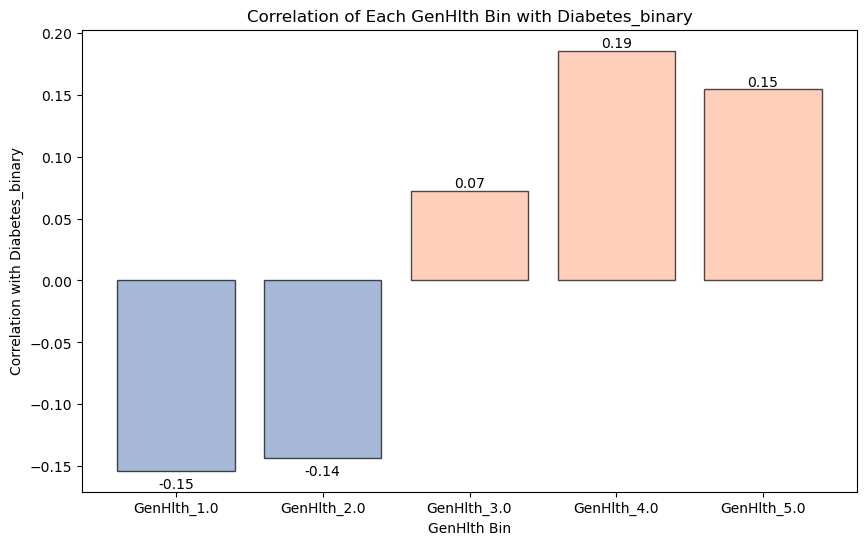

In [16]:
#Correlation of each bin of General Health feature with target variable (exploration for baseline)

# Step 1: One-hot encode the 'GenHlth' feature
genhlth_dummies = pd.get_dummies(df_diabetes_binary['GenHlth'], prefix='GenHlth')

# Step 2: Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df_diabetes_binary, genhlth_dummies], axis=1)

# Step 3: Calculate the correlation of each GenHlth bin with the target variable
correlations = df_encoded[genhlth_dummies.columns].corrwith(df_encoded['Diabetes_binary'])

# Convert the correlations to a DataFrame for easier plotting
correlations_df = pd.DataFrame(correlations, columns=['Correlation with Diabetes_binary']).reset_index()
correlations_df.columns = ['GenHlth Bin', 'Correlation with Diabetes_binary']

# Plotting the correlation values
plt.figure(figsize=(10, 6))
colors = ['#4c72b080' if corr < 0 else '#FFA07A80' for corr in correlations_df['Correlation with Diabetes_binary']]
bars = plt.bar(correlations_df['GenHlth Bin'], correlations_df['Correlation with Diabetes_binary'], color=colors)

# Set edge color with alpha
for bar in bars:
    bar.set_edgecolor((0, 0, 0, 0.7))  # RGBA for black with alpha 0.5

# Add exact numbers at the top of bars for positive correlation and bottom of bars for negative correlation
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, height - 0.005, f'{height:.2f}', ha='center', va='top', fontsize=10, color='black')

plt.title("Correlation of Each GenHlth Bin with Diabetes_binary")
plt.xlabel("GenHlth Bin")
plt.ylabel("Correlation with Diabetes_binary")
plt.show()

This additional plot shows the correlation of the feature General Health with the target variable Diabetes_binary. General Health represents the feature which has the highest correlation with the target variable.
The first two categories of the features, which stand for excellent and very good health, seem to have a negative correlation (according to their scaling) with the target variable compared to the other three worse categories. The other three categories (good, fair, and poor) positively correlate with the target variable, meaning there seems to be no definite causality of rather worse general health with a data/point person being predicted to be of/classified as class 1.0 (Diabetes) but at least there seems to exist a very slight correlation between the feature General Health and the target variable. 
It is interesting to see that already a General Health of "only" good seems to be the turning point towards predicting class Diabetes and that a general health of fair seems to have a higher positive correlation with the target variable than a poor general health, which might can be reasoned by the person's poor general health not being an indicator for particularly diabetes but other possible diseases.
